## Measuring the volatility of a return series

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
from openbb import obb

In [2]:
obb.user.preferences.output_type = "dataframe"

Fetches historical price data for the equity "AAPL" starting from 2020-01-01 using the "yfinance" provider and stores it in 'df'

In [3]:
df = obb.equity.price.historical("AAPL", start_date="2020-01-01", provider="yfinance")

In [4]:
display(df)

,open,high,low,close,volume,split_ratio,dividend
date,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,135480400,0.0,0.0
2020-01-03,74.287498,75.144997,74.125000,74.357498,146322800,0.0,0.0
2020-01-06,73.447502,74.989998,73.187500,74.949997,118387200,0.0,0.0
2020-01-07,74.959999,75.224998,74.370003,74.597504,108872000,0.0,0.0
2020-01-08,74.290001,76.110001,74.290001,75.797501,132079200,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-10,196.899994,197.300003,192.149994,193.119995,97262100,0.0,0.0
2024-06-11,193.649994,207.160004,193.630005,207.149994,172373300,0.0,0.0
2024-06-12,207.369995,220.199997,206.899994,213.070007,198134300,0.0,0.0


Selects the 'close' column from 'df' and stores it in 'close'

In [5]:
close = df["close"]

In [6]:
display(close)

date
2020-01-02     75.087502
2020-01-03     74.357498
2020-01-06     74.949997
2020-01-07     74.597504
2020-01-08     75.797501
                 ...    
2024-06-10    193.119995
2024-06-11    207.149994
2024-06-12    213.070007
2024-06-13    214.240005
2024-06-14    212.490005
Name: close, Length: 1121, dtype: float64

Calculates the percentage change of the 'close' prices and stores it in 'returns'

In [7]:
returns = close.pct_change()

In [8]:
display(returns)

date
2020-01-02         NaN
2020-01-03   -0.009722
2020-01-06    0.007968
2020-01-07   -0.004703
2020-01-08    0.016086
                ...   
2024-06-10   -0.019148
2024-06-11    0.072649
2024-06-12    0.028578
2024-06-13    0.005491
2024-06-14   -0.008168
Name: close, Length: 1121, dtype: float64

Calculates the standard deviation of the percentage returns, excluding NaN values

In [9]:
std_dev = returns.dropna().std()

In [10]:
display(std_dev)

0.020645474500698594

Annualizes the standard deviation by multiplying with the square root of 252 (trading days in a year)

In [11]:
std_dev * np.sqrt(252)

0.32773674736664327

Converts the index of 'close' to datetime format

In [12]:
close.index = pd.to_datetime(close.index)

Calculates the monthly percentage change, drops NaN values, calculates the standard deviation, and annualizes it

In [13]:
(close.pct_change(freq="ME").dropna().std() * np.sqrt(12))

0.30826609119838494

Calculates the quarterly percentage change, drops NaN values, calculates the standard deviation, and annualizes it

In [14]:
(close.pct_change(freq="QE").dropna().std() * np.sqrt(4))

0.38461527636615106

Calculates the rolling 22-day standard deviation of the daily percentage changes, annualizes it, and plots the result

<Axes: xlabel='date'>

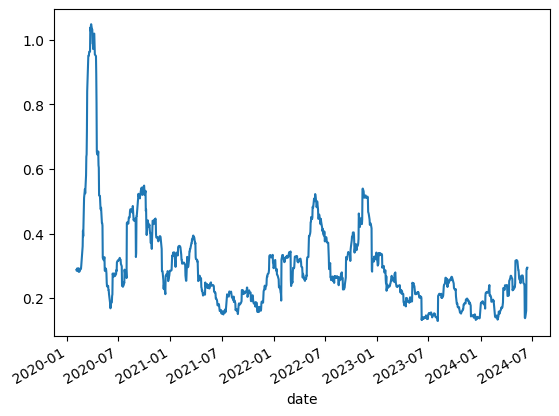

In [15]:
(close.pct_change().rolling(window=22).std() * np.sqrt(252)).plot()

**Jason Strimpel** is the founder of <a href='https://pyquantnews.com/'>PyQuant News</a> and co-founder of <a href='https://www.tradeblotter.io/'>Trade Blotter</a>. His career in algorithmic trading spans 20+ years. He previously traded for a Chicago-based hedge fund, was a risk manager at JPMorgan, and managed production risk technology for an energy derivatives trading firm in London. In Singapore, he served as APAC CIO for an agricultural trading firm and built the data science team for a global metals trading firm. Jason holds degrees in Finance and Economics and a Master's in Quantitative Finance from the Illinois Institute of Technology. His career spans America, Europe, and Asia. He shares his expertise through the <a href='https://pyquantnews.com/subscribe-to-the-pyquant-newsletter/'>PyQuant Newsletter</a>, social media, and has taught over 1,000+ algorithmic trading with Python in his popular course **<a href='https://gettingstartedwithpythonforquantfinance.com/'>Getting Started With Python for Quant Finance</a>**. All code is for educational purposes only. Nothing provided here is financial advise. Use at your own risk.